In [1]:
import datetime
import os
import re
import urllib
import sys
import math
import numpy as np
import pandas as pd
from scipy.stats import describe
from gensim.models.wrappers import FastText

from matplotlib import pyplot as plt

# Data files

# article_id, article_url
SRC_ARTICLES = '../data/guardian-all/articles-standardized.csv'
SRC_AUTHORS = '../data/guardian-all/authors-standardized.csv'
SRC_COMMENTS = '../data/guardian-all/sorted_comments-standardized.csv'
SRC_COMMENTS_POL = '../data/guardian-all/sorted_comments-standardized-pol.csv'
SRC_COMMENTS_POL_WITH_REPLIES = '../data/guardian-all/sorted_comments-standardized-pol-all.csv'
# SRC_COMMENTS_POL_TEXT = '../data/guardian-all/sorted_comments-standardized-pol-text.csv'
SRC_COMMENTS_TOKENIZED_BIN = "../data/guardian-all/guardian-comments-50-tokenized.bin"
SRC_COMMENTS_TOKENIZED_BIN_GENZIM = "../data/guardian-all/genzim-guardian-comments-50-tokenized.bin"

def save_embedding(word_vectors):
    print("saving embeddings...")
    # word_vectors = KeyedVectors.load_word2vec_format('wordvectors.w2v')
    word_vectors.save(SRC_COMMENTS_TOKENIZED_BIN_GENZIM)
    # word_vectors.save_word2vec_format('wordvectors.w2v')

c:\users\thomas\hpi\textmi~1\venv\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [ ]:
model = FastText.load_fasttext_format(SRC_COMMENTS_TOKENIZED_BIN)

In [6]:
model.wv.syn0

array([[-0.0083777 , -0.01473129,  0.0094247 , ...,  0.04598586,
         0.42242646, -0.00957054],
       [-0.4266928 , -0.05493597,  0.14741752, ...,  0.1000493 ,
         0.12693278,  0.08096434],
       [-0.25898644,  0.00965205, -0.0850468 , ..., -0.00539103,
         0.13712692,  0.0807016 ],
       ...,
       [ 0.05470753, -0.44842222, -0.15879278, ...,  1.0038762 ,
         0.05067444, -0.02777389],
       [ 0.18849128,  0.11893784, -0.36278257, ...,  0.51355916,
         0.31034178,  0.25437835],
       [-0.12586308,  0.6044583 , -0.20058095, ...,  0.38415805,
         0.2854009 ,  0.00634072]], dtype=float32)

In [5]:
model.wv.vocab

{'.': <gensim.models.deprecated.keyedvectors.Vocab at 0x2c1fe639550>,
 'the': <gensim.models.deprecated.keyedvectors.Vocab at 0x2c1fe6395c0>,
 ',': <gensim.models.deprecated.keyedvectors.Vocab at 0x2c1fe6395f8>,
 'to': <gensim.models.deprecated.keyedvectors.Vocab at 0x2c1fe639668>,
 "'": <gensim.models.deprecated.keyedvectors.Vocab at 0x2c1fe6396a0>,
 'of': <gensim.models.deprecated.keyedvectors.Vocab at 0x2c1fe639710>,
 'and': <gensim.models.deprecated.keyedvectors.Vocab at 0x2c1fe639780>,
 'a': <gensim.models.deprecated.keyedvectors.Vocab at 0x2c1fe6397b8>,
 '"': <gensim.models.deprecated.keyedvectors.Vocab at 0x2c1fe6397f0>,
 '</s>': <gensim.models.deprecated.keyedvectors.Vocab at 0x2c1fe639828>,
 'is': <gensim.models.deprecated.keyedvectors.Vocab at 0x2c1fe6398d0>,
 'in': <gensim.models.deprecated.keyedvectors.Vocab at 0x2c1fe639940>,
 'that': <gensim.models.deprecated.keyedvectors.Vocab at 0x2c1fe6399e8>,
 'I': <gensim.models.deprecated.keyedvectors.Vocab at 0x2c1fe639a20>,
 '-': 

In [71]:
save_embedding(model)

saving embeddings...


In [34]:
data_articles = pd.read_csv(SRC_ARTICLES)  # shape = (626395, 2)
# data_articles_pol = data_articles[data_articles['article_url'].str.contains('/politics/')]  # shape = (20167, 2)

Shape of data_articles_pol: (2876, 2)


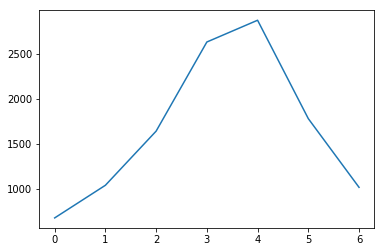

In [47]:
def get_articles(year):
    return data_articles[data_articles['article_url'].str.contains('/politics/{}'.format(year))]

plt.plot([get_articles(x).shape[0] for x in range(2011, 2018)])

# Let's use 2015 (most politics articles)
data_articles_pol = get_articles(2015)
print('Shape of data_articles_pol: {}'.format(data_articles_pol.shape))

In [48]:
article_ids = set(data_articles_pol['article_id'])
data_comments_pol = []  # Only parent comments
data_comments_pol_all = []  # Includes replies
headline = pd.read_csv(SRC_COMMENTS, nrows=10)
for df_chunk in pd.read_csv(SRC_COMMENTS, header=None, skiprows=0, chunksize=1000000):
    print('.', end='')
    matches = df_chunk[df_chunk[0].isin(article_ids)]
    if len(matches):
        print(len(matches), end='')
        data_comments_pol_all.append(matches)
        
        # Remove replies
        matches = matches[matches[5].isnull()]  # index 5 is 'parent_comment_id'
        if len(matches):
            print('({})'.format(len(matches)), end='')
            data_comments_pol.append(matches)
            
data_comments_pol = pd.concat(data_comments_pol)
data_comments_pol.columns = headline.columns  # shape = (40974, 7)
columns = list(headline.columns)
columns.remove('parent_comment_id')
data_comments_pol = data_comments_pol[columns]  # shape = (40974, 6)
data_comments_pol.to_csv(SRC_COMMENTS_POL)

data_comments_pol_all = pd.concat(data_comments_pol_all)
data_comments_pol_all.columns = headline.columns  # shape = (?, 7)
data_comments_pol_all.to_csv(SRC_COMMENTS_POL_WITH_REPLIES)

c:\users\thomas\hpi\textmi~1\venv\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


.4234(1528).63815(18845).8328(2613).634(198).18173(5557).37563(12202).2617(658).6790(1871).204(114).4280(1468)..202(53).897(273).2371(831).4443(1403).67569(21161).8459(2681).19(7).44185(14309).127(41).3154(1032).889(373).4007(1439).959(288).692(261).3407(1181).45084(14394).2453(706).172(81).37597(12480).3075(700).2657(996)..1214(337).164(78).46744(14345).4217(1315).34304(11016).2223(857).2467(756).140(38).2348(930).33718(10547).22853(7335).1264(360).287(177).653(259).2343(800).674(212).1532(472).24535(7062).17325(5709).1007(279).272(75).25270(8133).15841(5134).417(98).16684(5716).9198(2906).13620(4850).4322(1525).831(200)